<a href="https://colab.research.google.com/github/dataexpert-moon/CUAI_6year/blob/demo-repo/DL_Study/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%95%EB%8B%AC%EB%AF%BC_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 밑바닥부터 시작하는 딥러닝 Chapter 3 신경망을 다루었습니다!

### 3.1 퍼셉트론에서 신경망으로

##### 지난 2장 내용 복습

### 3.2 활성화 함수

In [ ]:
# 활성화 함수: 입력 신호의 총합을 출력 신호로 변환하는 함수
# 활성화 함수의 역할: 입력 신호의 총합이 활성화를 일으키는지 정하는 역할
# 가중치가 곱해진 입력 신호의 총합을 계산하고(a), 그 합을 활성화 함수에 입력해 결과를 내는 2단계 처리
# 활성화 함수는 퍼셉트론에서 신경망으로 가기 위한 길잡이

In [ ]:
# 계단 함수는 임계값을 경계로 출력이 바뀌는데의 함수
# 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수
# 퍼셉트론에서는 활성화 함수로 계단 함수를 이용
# 신경망에서 자주 이용하는 활성화 함수: 시그모이드 함수

In [ ]:
# 계단 함수 정의
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
# 넘파이 배열을 받을 수 있는 계단 함수 정의
import numpy as np

def step_function_array(x):
    y = x > 0
    return y.astype(int)


In [ ]:
# 위 함수(넘파이의 '트릭') 자세히 살펴보기

import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = y.astype(np.int) # astype을 이용해 y의 원소를 bool형에서 int형으로 바꾸기
print(y)



[-1.  1.  2.]
[False  True  True]
[0 1 1]


<ipython-input-5-eb6bd2b656ab>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int) # astype을 이용해 y의 원소를 bool형에서 int형으로 바꾸기


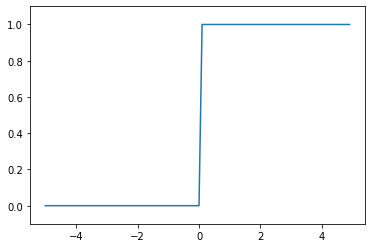

In [ ]:
# 계단 함수 그래프 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0전까지 0.1간격의 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show() # 계단 함수는 0을 경계로 출력이 0에서 1로 바뀐다.

In [ ]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 시그모이드 공식

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

# 브로드캐스팅 이용하기

t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)


[0.26894142 0.73105858 0.88079708]
[2. 3. 4.]
[1.         0.5        0.33333333]


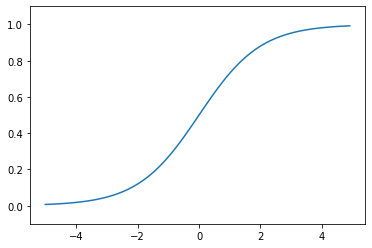

In [ ]:
# 시그모이드 함수 그래프로 그려보기

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()



In [ ]:
# 시그모이드 함수와 계단 함수 비교
# 차이점: 시그모이드 함수가 계단 함수보다 부드러운 곡선으로 표현되어 매끄럽다
# 공통점: 
# 둘 다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조이다
# 입력이 아무리 작거나 커도 출력은 0에서 1사이다
# 비선형 함수이다

In [ ]:
# 선형 함수: 출력이 입력의 상수배만큼 변하는 함수
# 비선형 함수: 선형이 아닌 함수, 직선 1개로는 그릴 수 없는 함수

# 신경망에서의 함수는 비선형 함수를 사용해야 한다
# 그 이유는 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다

In [ ]:
# ReLU(렐루) 함수
# ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력하는 함수

def relu(x):
    return np.maximum(0, x) # maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

### 3.3 다차원 배열의 계산

In [ ]:
# 다차원 배열의 계산
# 다차원 배열은 숫자의 집합

In [ ]:
# 1차원 배열의 집합
import numpy as np
a = np.array([1, 2, 3, 4])
print(a)

print(np.ndim(a)) # 배열의 차원 확인

print(a.shape) # 배열의 형상 확인
# 1차원 배열은 다차원 배열일 떄와 동일한 형태로 결과를 반환하기에 튜플을 반환

print(a.shape[0]) 


[1 2 3 4]
1
(4,)
4


In [ ]:
# 2차원 배열의 집합
b = np.array([[1, 2], [3, 4], [5, 6]])
print(b)

print(np.ndim(b))

print(b.shape)

print(b.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [ ]:
# 행렬의 곱
# 행렬 곱은 왼쪽 행렬의 행(가로)과 오른쪽 형태의 열(세로)을 원소별로 곱하고 그 값을 더해서 계산

a = np.array([[1, 2], [3, 4]])
print(a.shape)

b = np.array([[5, 6], [7, 8]])
print(b.shape)

print(np.dot(a, b)) # 행렬의 내적



(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [ ]:
# np.dot(a, b) 와 np.dot(b, a)는 다르다
# 댜챠원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다

a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.shape)

b = np.array([[1, 2], [3, 4], [5, 6]])
print(b.shape)

print(np.dot(a, b)) # 2x3, 3x2 => 2x2 행렬


(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [ ]:
# 대응하는 차원의 원소 수를 일치시키는 예시

a = np.array([[1, 2], [3, 4], [5, 6]]) # 3x2
print(a.shape)

b = np.array([7, 8]) # 1차원 배열이기 때문에 1x2나 2x1를 선택하면 된다
print(b.shape)

print(np.dot(a, b))


(3, 2)
(2,)
[23 53 83]


In [ ]:
# 신경망에서의 행렬 곱
# 편향과 활성화 함수를 생략하고 가중치만 갖는 간단한 신경망 구현하기

x = np.array([1, 2])
print(x.shape)

w = np.array([[1, 3, 5], [2, 4, 6]])
print(w)
print(w.shape)

y = np.dot(x, w) # x와 w의 대응하는 차원의 원소 수가 같아야 한다
print(y)


(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


### 3.4 3층 신경망 구현하기

In [ ]:
# 3층 신경망 구현하기
# 핵심은 신경망에서의 계산을 행렬 계산으로 정리할 수 있다는 것
# 신경망 각 층의 계산은 행렬의 곱으로 처리할 수 있다

x = np.array([1.0, 0.5]) # 입력 신호 2개
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 가중치
b1 = np.array([0.1, 0.2, 0.3]) # 편향

print(w1.shape) # (2, 3)
print(x.shape) # (2, )
print(b1.shape) # (3, 1)

a1 = np.dot(x, w1) + b1
print(a1)


(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [ ]:
# 활성화 함수에서의 계산

z1 = sigmoid(a1)

# 1층의 각 뉴런에 해당하는 값
print(a1) # [0.3, 0.7, 1.1] 

# 활성화 함수인 시그모이드 함수를 이용하여 신호를 변환한다
print(z1) # [0.57444252 0.66818777 0.75026011]


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 1층에서 2층으로 가는 과정 구현하기

# 1층의 출력 z1이 2층의 입력이 된다는 점을 제외하면 0층에서 1층으로 가는 구현과 동일하다
# 가중치의 차원은 이전 층의 뉴런 개수, 현재 층의 뉴런 개수

w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1층 뉴런에서의 가중치  
b2 = np.array([0.1, 0.2]) # 편향

print(z1.shape) # (3, )
print(w2.shape) # (3, 2)
print(b2.shape) # (2, )

a2 = np.dot(z1, w2) + b2
print(a2)

z2 = sigmoid(a2) # 입력 신호의 총합을 출력 신호로 변환해주는 활성화 함수인 sigmoid 함수 실행
print(z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [ ]:
# 2층에서 출력층으로의 신호 전달
# 이전에서 했던 구현과 같지만, 딱 하나 활성화 함수만 지금까지의 은닉층과 다르다
# 회귀에서는 항등 함수, 2클래스 분류에서는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다

# 항등 함수 정의
def identity_function(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # 2층 뉴런에서의 가중치
b3 = np.array([0.1, 0.2]) # 편향

a3 = np.dot(z2, w3) + b3 # 가중치의 합
y = identity_function(a3) # 혹은 y = y3



In [ ]:
# 구현 정리

# 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장하는 함수(init_network)
def init_network():
    network = {}
    # 1층과 2층의 뉴런의 개수는 각각 3,2개이다
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 0층 뉴런의 가중치
    network['b1'] = np.array([0.1, 0.2, 0.3]) # 0층 뉴런의 편향
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1층 뉴런의 가중치
    network['b2'] = np.array([0.1, 0.2]) # 1층 뉴런의 편향
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # 2층 뉴런의 가중치
    network['b3'] = np.array([0.1, 0.2]) # 2층 뉴런의 편향
    
    return network

# 입력 신호를 출력으로 변환하는 처리 과정을 구현한 함수(forward)
def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]



[0.31682708 0.69627909]


### 3.5 출력층 설계하기

In [ ]:
# 신경망은 분류와 회귀 모두 이용 가능
# 일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수를 사용한다

In [ ]:
# 항등 함수는 입력을 그대로 출력
# 항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표를 그린다

# 분류에서 사용하는 소프트맥스 함수의 특징은 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받는다

In [ ]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)


[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# 소프트맥스 함수 정의
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


In [ ]:
# 소프트맥스 함수 구현 시 주의점
# 소프트맥스 함수는 지수 함수를 사용하므로, 오버플로 문제가 발생한다
# 오버플로란 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현 할 수 없다는 문제
# 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

a = np.array([1010, 1000, 990])

# 소프트맥스 함수의 계산
# np.exp(a) / np.sum(np.exp(a)) # array([nan, nan, nan]) , 제대로 계산되지 않는다

# 입력 신호 중 최댓값(여기에서는 c)을 빼주면 올바르게 계산 가능하다

c = np.max(a) # c는 1010 (최댓값)
print(a - c)

print(np.exp(a-c) / np.sum(np.exp(a-c))) 

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [ ]:
# 임의의 정수(최댓값)를 사용하여 소프트맥스 함수 다시 정의하기
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


In [ ]:
# 소프트맥스 함수의 특징
# 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이며, 출력의 총합은 1이다 (매우 중요)
# 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있다

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

# 여기서는 y[2]의 확률이 가장 높으므로, 답은 "2번째 클래스"라고 할 수 있다.

[0.01821127 0.24519181 0.73659691]
1.0


### 3.6 손글씨 숫자 인식

In [ ]:
# 소프트맥스 함수를 적용해도 각 원소의 대응 관계는 변하지 않는다
# 그 이유는 소프트맥스 함수에서 사용되는 지수함수가 단조 증가 함수이기 떄문이다
# 따라서 현업(신경망을 이용한 분류)에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스만 인식한다
# 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다

In [ ]:
# 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다
# 예를 들어 입력 이미지를 숫자 0부터 9로 분류하는 문제라면 출력층의 뉴런은 총 10개로 설정한다
# 색이 가장 짙은 뉴런이 가장 큰 값을 출력하며, 이 신경망이 선택한 클래스는 입력 이미지를 해당 원소의 레이블로 판단한다

In [ ]:
# 신경망은 2단계를 거쳐 문제를 해결한다
# 1. 훈련 데이터를 사용해 가중치 매개변수를 학습한다
# 2. 추론 단계에서는, 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다

from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 형상 변환
x_train = x_train.reshape(60000, 28 * 28) # (60000, 28, 28)
x_test = x_test.reshape(10000, 28 * 28)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, )
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000, )


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
# MNIST 이미지 화면으로 불러오기
# 입력층 뉴런은 874개, 출력층 뉴런은 10개로 구성
# 입력층 뉴런은 이미지 크기가 28x28이고, 출력층 뉴런은 0부터 9까지의 숫자를 구분하기 때문이다
from google.colab import drive
drive.mount('/content/drive/')
from tensorflow.keras.datasets import mnist
import numpy as np
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 형상 변환
x_train = x_train.reshape(60000, 28 * 28) # (60000, 28, 28)
x_test = x_test.reshape(10000, 28 * 28)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 분할
print(img.shape) # (28, 28)

img_show(img)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
5
(784,)
(28, 28)


In [ ]:
# 순서대로 작업 처리할 세 함수 정의하기
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os
import pickle

def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # 형상 변환
    x_train = x_train.reshape(60000, 28 * 28) # (60000, 28, 28)
    x_test = x_test.reshape(10000, 28 * 28)
    return x_test, y_test

def init_network():
    file_path = "/content/gdrive/MyDrive/CUAI_6th/DL1_Study/Chapter_3/sample_weight.pkl"
    with open(file_path, 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)


    return y



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]: # 예측 결과가 맞다면
        accuracy_cnt += 1 # 정확도 추가

print("Accuracy: " + str(float(accuracy_cnt / len(x))))


<ipython-input-7-29bf1fc0be08>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x)) # 시그모이드 공식


Accuracy0.9207


In [ ]:
# 다차원 배열의 대응하는 차원의 원소 수가 일치
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

# 배치(묶음)
# 배치는 모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음



(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # range(start, end, step)
    x_batch = x[i:i+batch_size] 
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9207


<ipython-input-7-29bf1fc0be08>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x)) # 시그모이드 공식


### 3.7 정리

In [ ]:
# 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 퍼셉트론과 같다
# 다만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수가 존재한다

# 정리

# 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다
# 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다
# 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다
# 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 소프트맥스 함수를 이용한다
# 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다
# 입력 데이터를 묶은 것을 배치라고 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다